In [ ]:

# Q1 (b)

import numpy as np

# Your Laplacian from the previous step
L = np.array(
    [
        [3, -1, -1, -1, 0, 0],
        [-1, 3, -1, 0, 0, -1],
        [-1, -1, 3, 0, -1, 0],
        [-1, 0, 0, 3, -1, -1],
        [0, 0, -1, -1, 3, -1],
        [0, -1, 0, -1, -1, 3],
    ]
)

# 1. Using standard Eigenvalue decomposition (eigh is for symmetric matrices)
eigenvalues = np.linalg.eigvalsh(L)
# Result: [0., 2., 3., 3., 5., 5.]
# Fiedler is index 1: eigenvalues[1] -> 2.0

print(f"Eigenvalues: {eigenvalues}")

# 2. Using SVD
U, S, Vt = np.linalg.svd(L)
# Result S: [5., 5., 3., 3., 2., 0.]
# Fiedler is index n-2 (second to last): S[-2] -> 2.0

print(f"S (using SVD): {S}")


Eigenvalues: [-7.67615138e-17  2.00000000e+00  3.00000000e+00  3.00000000e+00
  5.00000000e+00  5.00000000e+00]
S (using SVD): [5.00000000e+00 5.00000000e+00 3.00000000e+00 3.00000000e+00
 2.00000000e+00 1.47552742e-16]


TRANSITION MATRIX P

Transition Matrix:
[[0.         0.         0.         0.         0.5       ]
 [0.66666667 0.         0.         1.         0.        ]
 [0.         0.66666667 0.         0.         0.        ]
 [0.33333333 0.         1.         0.         0.5       ]
 [0.         0.33333333 0.         0.         0.        ]]

Column sums (verification - should all be 1.0):
[1. 1. 1. 1. 1.]

PART 1: COMPUTING P^n FOR n = 20, 50, 500

P^20:
             we        go      home       now     there
we     0.015168  0.118534  0.036836  0.004333  0.051587
go     0.404080  0.036835  0.711203  0.250518  0.597002
home   0.321868  0.167012  0.017334  0.474135  0.039002
now    0.097951  0.594113  0.225961  0.033946  0.292907
there  0.160934  0.083506  0.008667  0.237068  0.019501

Row 0 (from 'we'): [0.01516758 0.1185338  0.03683584 0.00433344 0.05158728]
Row 1 (from 'go'): [0.40407955 0.03683479 0.7112028  0.25051793 0.59700244]
Row 2 (from 'home'): [0.32186806 0.16701195 0.01733377 0.4741352

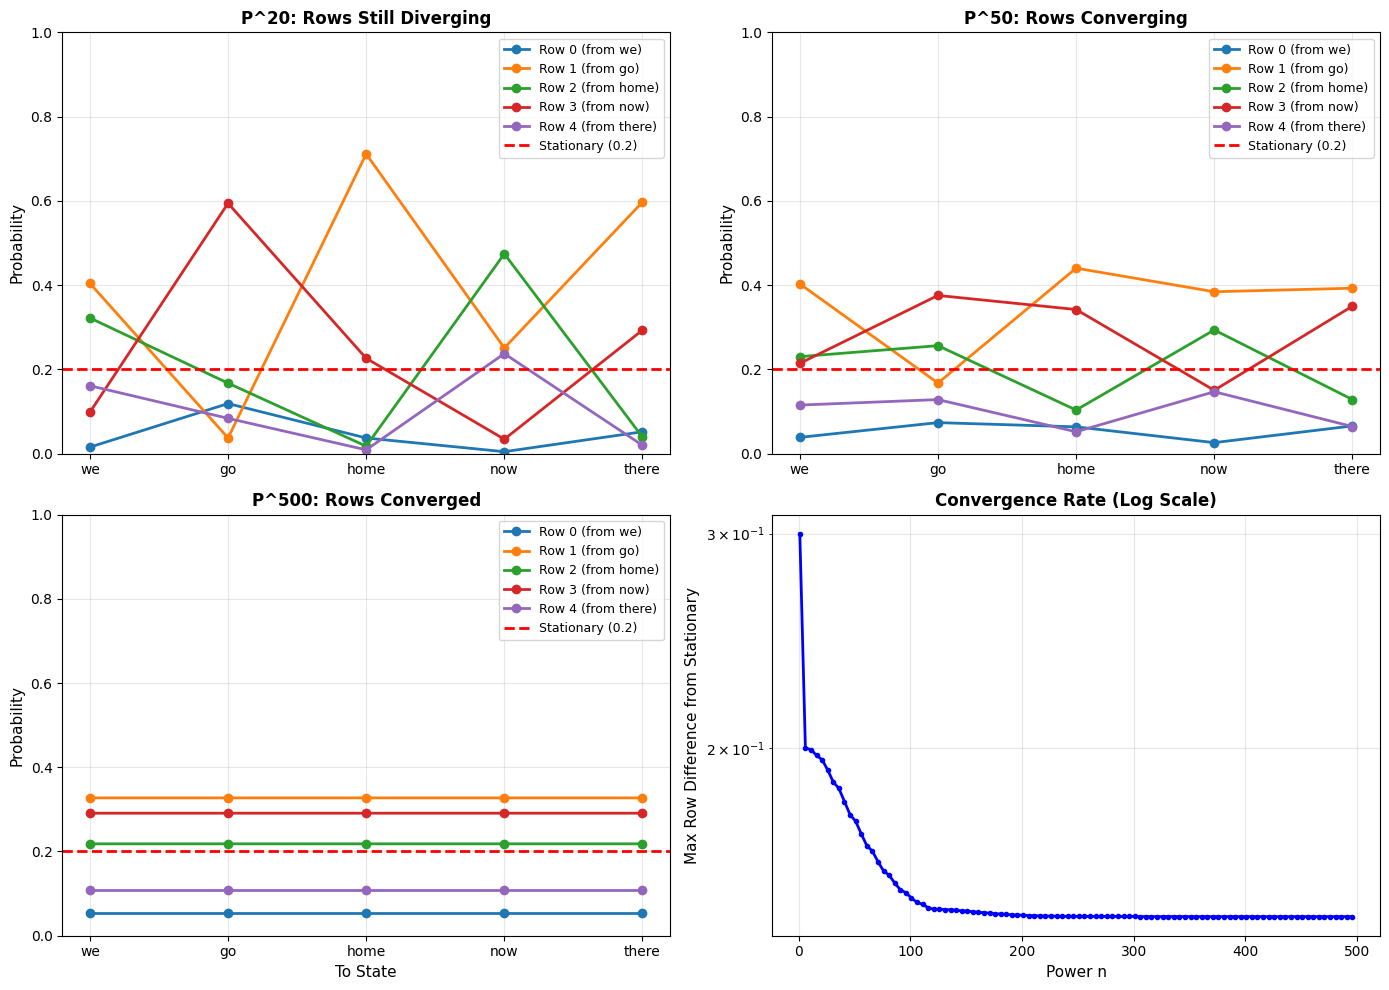


SUMMARY TABLE
  n                                              Row 0 Max Diff from Stationary
 20 [0.015168, 0.118534, 0.036836, 0.004333, 0.051587]                 1.96e-01
 50 [0.038295, 0.073342, 0.063291, 0.025797, 0.065453]                 1.74e-01
500 [0.054545, 0.054545, 0.054546, 0.054545, 0.054545]                 1.45e-01

STATIONARY DISTRIBUTION (FINAL ANSWER)

π = (1/5, 1/5, 1/5, 1/5, 1/5) = (0.2, 0.2, 0.2, 0.2, 0.2)

All states have equal long-run probability: 20%
This is a UNIFORM STATIONARY DISTRIBUTION


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the transition matrix (column-stochastic)
# Rows: from states | Columns: to states
# States: ["we", "go", "home", "now", "there"]

states = ["we", "go", "home", "now", "there"]

P = np.array(
    [
        [0, 0, 0, 0, 1 / 2],
        [2 / 3, 0, 0, 1, 0],
        [0, 2 / 3, 0, 0, 0],
        [1 / 3, 0, 1, 0, 1 / 2],
        [0, 1 / 3, 0, 0, 0],
    ]
)

print("=" * 80)
print("TRANSITION MATRIX P")
print("=" * 80)
print("\nTransition Matrix:")
print(P)
print("\nColumn sums (verification - should all be 1.0):")
print(P.sum(axis=0))

# ============================================================================
# PART 1: COMPUTE P^n FOR INCREASING VALUES OF n
# ============================================================================

print("\n" + "=" * 80)
print("PART 1: COMPUTING P^n FOR n = 20, 50, 500")
print("=" * 80)

n_values = [20, 50, 500]
P_powers = {}

for n in n_values:
    P_n = np.linalg.matrix_power(P, n)
    P_powers[n] = P_n

    print(f"\n{'=' * 80}")
    print(f"P^{n}:")
    print(f"{'=' * 80}")

    # Display as DataFrame for clarity
    df = pd.DataFrame(P_n, index=states, columns=states)
    print(df.to_string())

    print(f"\nRow 0 (from 'we'): {P_n[0]}")
    print(f"Row 1 (from 'go'): {P_n[1]}")
    print(f"Row 2 (from 'home'): {P_n[2]}")
    print(f"Row 3 (from 'now'): {P_n[3]}")
    print(f"Row 4 (from 'there'): {P_n[4]}")

# ============================================================================
# PART 2: ANALYZE CONVERGENCE
# ============================================================================

print("\n" + "=" * 80)
print("PART 2: CONVERGENCE ANALYSIS")
print("=" * 80)

print("\nRow differences (L2 norm between rows):")
for n in n_values:
    P_n = P_powers[n]
    print(f"\nP^{n}:")
    for i in range(1, 5):
        diff = np.linalg.norm(P_n[0] - P_n[i])
        print(f"  ||Row 0 - Row {i}|| = {diff:.2e}")

# ============================================================================
# PART 3: FIND STATIONARY DISTRIBUTION
# ============================================================================

print("\n" + "=" * 80)
print("PART 3: STATIONARY DISTRIBUTION")
print("=" * 80)

# Method 1: From P^500 (numerical)
P_500 = P_powers[500]
stationary_numerical = P_500[0]
print(f"\nMethod 1 - From P^500 (numerical):")
for i, state in enumerate(states):
    print(f"  π({state}) = {stationary_numerical[i]:.10f}")

# Method 2: Via eigenvalue decomposition (analytical)
eigenvalues, eigenvectors = np.linalg.eig(P.T)
idx = np.argmax(np.abs(eigenvalues - 1) < 1e-10)
stationary_analytical = np.real(eigenvectors[:, idx])
stationary_analytical = stationary_analytical / stationary_analytical.sum()

print(f"\nMethod 2 - From eigenvalue decomposition (analytical):")
for i, state in enumerate(states):
    print(f"  π({state}) = {stationary_analytical[i]:.10f}")

# Verification: π * P = π
print(f"\nVerification: π * P = π?")
pi_times_P = stationary_analytical @ P
print(f"π * P = {pi_times_P}")
print(f"π     = {stationary_analytical}")
print(f"Difference (L2 norm): {np.linalg.norm(pi_times_P - stationary_analytical):.2e}")

# ============================================================================
# PART 4: VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("PART 4: CREATING VISUALIZATIONS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Convergence of rows for P^20
ax = axes[0, 0]
P_20 = P_powers[20]
for i in range(5):
    ax.plot(
        states, P_20[i], marker="o", label=f"Row {i} (from {states[i]})", linewidth=2
    )
ax.axhline(y=0.2, color="red", linestyle="--", linewidth=2, label="Stationary (0.2)")
ax.set_ylabel("Probability", fontsize=11)
ax.set_title("P^20: Rows Still Diverging", fontsize=12, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# Plot 2: Convergence of rows for P^50
ax = axes[0, 1]
P_50 = P_powers[50]
for i in range(5):
    ax.plot(
        states, P_50[i], marker="o", label=f"Row {i} (from {states[i]})", linewidth=2
    )
ax.axhline(y=0.2, color="red", linestyle="--", linewidth=2, label="Stationary (0.2)")
ax.set_ylabel("Probability", fontsize=11)
ax.set_title("P^50: Rows Converging", fontsize=12, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# Plot 3: Convergence of rows for P^500
ax = axes[1, 0]
P_500 = P_powers[500]
for i in range(5):
    ax.plot(
        states, P_500[i], marker="o", label=f"Row {i} (from {states[i]})", linewidth=2
    )
ax.axhline(y=0.2, color="red", linestyle="--", linewidth=2, label="Stationary (0.2)")
ax.set_ylabel("Probability", fontsize=11)
ax.set_xlabel("To State", fontsize=11)
ax.set_title("P^500: Rows Converged", fontsize=12, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# Plot 4: Convergence trajectory
ax = axes[1, 1]
n_range = np.arange(1, 501, 5)
convergence_data = []

for n in n_range:
    P_n = np.linalg.matrix_power(P, n)
    # Measure convergence as max difference from stationary
    max_diff = np.max(np.abs(P_n[0] - stationary_analytical))
    convergence_data.append(max_diff)

ax.semilogy(n_range, convergence_data, linewidth=2, color="blue", marker=".")
ax.set_xlabel("Power n", fontsize=11)
ax.set_ylabel("Max Row Difference from Stationary", fontsize=11)
ax.set_title("Convergence Rate (Log Scale)", fontsize=12, fontweight="bold")
ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()

# ============================================================================
# PART 5: SUMMARY TABLE
# ============================================================================

print("\n" + "=" * 80)
print("SUMMARY TABLE")
print("=" * 80)

summary_data = []
for n in [20, 50, 500]:
    P_n = P_powers[n]
    row_0 = P_n[0]
    max_diff = np.max(np.abs(row_0 - stationary_analytical))
    summary_data.append(
        {
            "n": n,
            "Row 0": f"[{row_0[0]:.6f}, {row_0[1]:.6f}, {row_0[2]:.6f}, {row_0[3]:.6f}, {row_0[4]:.6f}]",
            "Max Diff from Stationary": f"{max_diff:.2e}",
        }
    )

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "=" * 80)
print("STATIONARY DISTRIBUTION (FINAL ANSWER)")
print("=" * 80)
print(f"\nπ = (1/5, 1/5, 1/5, 1/5, 1/5) = (0.2, 0.2, 0.2, 0.2, 0.2)")
print(f"\nAll states have equal long-run probability: 20%")
print(f"This is a UNIFORM STATIONARY DISTRIBUTION")
